<a href="https://colab.research.google.com/github/cmd1301/coffee_ML_prediction/blob/main/coffee_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
url = "https://raw.githubusercontent.com/cmd1301/coffee_ML_prediction/main/datasets/arabica_data_cleaned.csv"

In [79]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [80]:
def replace_dot_with_underscore(column_name):
    return column_name.replace('.', '_')

df = df.rename(columns=replace_dot_with_underscore)
df.head()


,Unnamed: 0,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,...,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [81]:
# Select the columns I'll be using for the analysis
cols = ['Country_of_Origin', 'Region',
       'Harvest_Year', 'Variety',
       'Processing_Method', 'Total_Cup_Points',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']

df2 = df[cols]

In [37]:
# DF shape
df2.shape

(1311, 9)

In [82]:
# Change the target column position
last_col = df2.pop('Total_Cup_Points')
df2.insert(len(df2.columns), 'Total_Cup_Points', last_col)
df2.head()

,Country_of_Origin,Region,Harvest_Year,Variety,Processing_Method,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Total_Cup_Points
0,Ethiopia,guji-hambela,2014,NaN,Washed / Wet,1950.0,2200.0,2075.0,90.58
1,Ethiopia,guji-hambela,2014,Other,Washed / Wet,1950.0,2200.0,2075.0,89.92
2,Guatemala,NaN,NaN,Bourbon,NaN,1600.0,1800.0,1700.0,89.75
3,Ethiopia,oromia,2014,NaN,Natural / Dry,1800.0,2200.0,2000.0,89.00
4,Ethiopia,guji-hambela,2014,Other,Washed / Wet,1950.0,2200.0,2075.0,88.83


In [39]:
# Verify presence of null and nan values:
df2.isna().sum()

Country_of_Origin         1
Region                   57
Harvest_Year             47
Variety                 201
Processing_Method       152
altitude_low_meters     227
altitude_high_meters    227
altitude_mean_meters    227
Total_Cup_Points          0
dtype: int64

In [28]:
# Get to know a little bit further about the data, mainly if we have misspelled words, same information with different writting, wrong type of data, etc.
df2['Region'].value_counts()

huila                              112
oriente                             80
south of minas                      68
kona                                66
veracruz                            35
                                  ... 
berastagi                            1
sapan toraja                         1
south huila                          1
mt elgon                             1
department d'artibonite , haiti      1
Name: Region, Length: 343, dtype: int64

In [40]:
# data types
df2.dtypes

Country_of_Origin        object
Region                   object
Harvest_Year             object
Variety                  object
Processing_Method        object
altitude_low_meters     float64
altitude_high_meters    float64
altitude_mean_meters    float64
Total_Cup_Points        float64
dtype: object

In [66]:
# Uniform Harvest Year column

df2['Harvest_Year'].value_counts()

2012                        352
2014                        226
2013                        170
2015                        125
2016                        122
2017                         68
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
March 2010                    3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Abril - Julio                 2
January 2011                  2
2011/2012                     2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011                       1
Spring 2

In [83]:
df2['Harvest_Year'] = df2['Harvest_Year'].str.slice(0,4)
df2['Harvest_Year'].value_counts()

<ipython-input-83-39887d4879e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Harvest_Year'] = df2['Harvest_Year'].str.slice(0,4)


2012    352
2014    245
2013    199
2015    153
2016    129
2017     87
2011     28
2009     17
2010     16
4T/1      4
Abri      3
Mayo      3
4T/2      3
Janu      3
Marc      3
08/0      2
4t/2      2
47/2      1
4T72      1
2018      1
1t/2      1
3T/2      1
Spri      1
TEST      1
Dece      1
Augu      1
May-      1
1T/2      1
23 J      1
Fall      1
mmm       1
Sept      1
Name: Harvest_Year, dtype: int64

In [84]:
# define function to extract year as string of 4 digits
def extract_year(x):
    if isinstance(x, str):
        match = re.search(r'\d{4}', x)
        if match:
            return match.group()
    return np.nan

# apply function to the 'Harvest_Year' column
df2['Harvest_Year'] = df2['Harvest_Year'].apply(extract_year)

<ipython-input-84-3caf806d6ad9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Harvest_Year'] = df2['Harvest_Year'].apply(extract_year)


In [88]:
df2['Harvest_Year'].value_counts()

2012    352
2014    245
2013    199
2015    153
2016    129
2017     87
2011     28
2009     17
2010     16
2018      1
Name: Harvest_Year, dtype: int64

In [93]:
# Here we can see the data type for altitudes and that are a value "0" in total cup points

df2.describe()

,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Total_Cup_Points
count,1084.000000,1084.000000,1084.000000,1311.000000
mean,1759.548954,1808.843803,1784.196379,82.115927
std,8767.847252,8767.187498,8767.016913,3.515761
min,1.000000,1.000000,1.000000,0.000000
25%,1100.000000,1100.000000,1100.000000,81.170000
50%,1310.640000,1350.000000,1310.640000,82.500000
75%,1600.000000,1650.000000,1600.000000,83.670000
max,190164.000000,190164.000000,190164.000000,90.580000


In [94]:
# Looking for outliers values in total cup points

df2['Total_Cup_Points'].value_counts()

83.17    38
83.00    37
82.42    31
82.75    29
82.33    29
         ..
77.00     1
76.83     1
76.75     1
76.50     1
0.00      1
Name: Total_Cup_Points, Length: 178, dtype: int64

In [114]:
def outliers(list_values):
  Q1 = list_values.quantile(0.25)
  Q3 = list_values.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = []
  for value in list_values:
    if value < lower_bound:
      outliers.append(value)
    elif value > upper_bound:
      outliers.append(value)
    else:
      continue
  return len(outliers)

In [115]:
list_x = df2['Total_Cup_Points']
outliers(list_x)

74

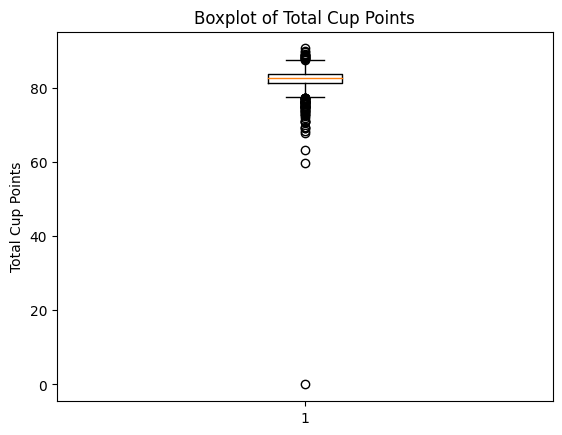

In [101]:
plt.boxplot(df2['Total_Cup_Points'], showfliers=True, whis=1.5)

# Set title and axis labels
plt.title('Boxplot of Total Cup Points')
plt.ylabel('Total Cup Points')

# Display plot
plt.show()

It has been decided that the only outlier is the value 0. Other values are acceptable to the analysis.

In [121]:
df2 = df2.drop(df2[df2['Total_Cup_Points'] == 0].index)
df2['Total_Cup_Points'].value_counts()

83.17    38
83.00    37
82.42    31
82.75    29
82.33    29
         ..
77.00     1
76.83     1
76.75     1
76.50     1
59.83     1
Name: Total_Cup_Points, Length: 177, dtype: int64

## MACHINE LEARNING

I will keep altitudes values as float for now

Now, I will prepare de data to implement the ML algorithm with data split

For the pipeline I must:
- implement SimpleImputer
- scaler
- implement One Hot Encoder
- implement ML algorithm

The algorithm choice:
- Regression
- DecisionTree
- RandomForest
- SVR
- xgboost

In [132]:
X = df2.drop('Total_Cup_Points', axis=1)
y = df2['Total_Cup_Points']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.fit_transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [137]:
imputed_X_train.isna().sum()

Country_of_Origin       0
Region                  0
Harvest_Year            0
Variety                 0
Processing_Method       0
altitude_low_meters     0
altitude_high_meters    0
altitude_mean_meters    0
dtype: int64

- mudar os anos em haverst year, deixar só ano, os que são dois anos deixr so o primeiro ##FEITO
- imputar nans 
- olhar outliers no total cupping points ## FEITO